In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
%matplotlib inline

In [67]:
df = pd.read_csv("StudentsPerformance.csv")

In [68]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
df.shape

(1000, 8)

In [70]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [71]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [72]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Checking for null values

In [73]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [74]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Adding a new coloumn "total score" to get better inferences with the data

In [75]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
inplace=True
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [76]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
total score                     int64
dtype: object

In [77]:
df.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


plotting corrrlation heatmap using seaborn

Text(0.5, 1, 'Covariance Plot')

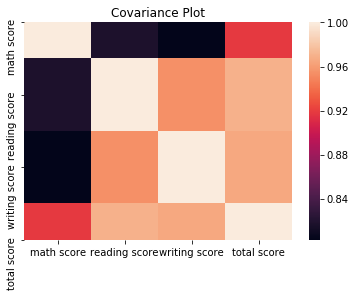

In [39]:
sns.heatmap(df.corr())
plt.title('Covariance Plot')

finding distribution of each feature

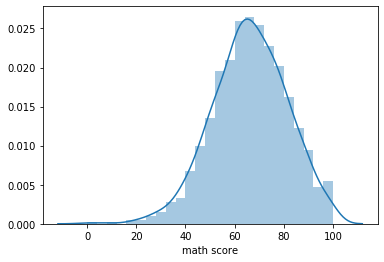

In [40]:
sns.distplot(df['math score'])

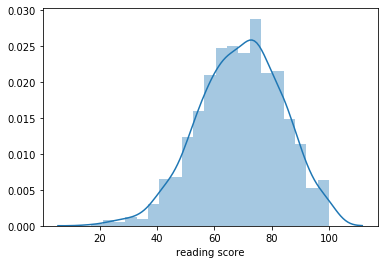

In [41]:
sns.distplot(df['reading score'])

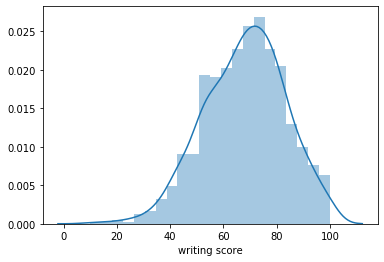

In [42]:
sns.distplot(df['writing score'])

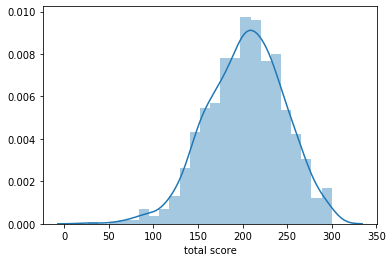

In [44]:
sns.distplot(df['total score'])

Number of Students against Scores in all the 3 subjects

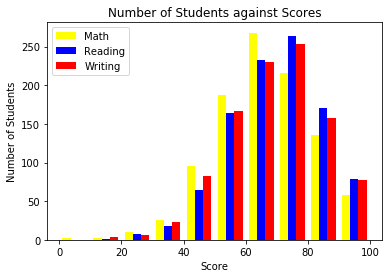

In [45]:
plt.hist([df['math score'],df['reading score'],df['writing score']], color=['yellow', 'blue', 'red'])
plt.title('Number of Students against Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.legend(['Math', 'Reading', 'Writing'])
plt.show()

From above Number of students with higher score in mathematics have dropped below than reading and writing which may show that is easier to get a higher score in reading and writing than mathematics.

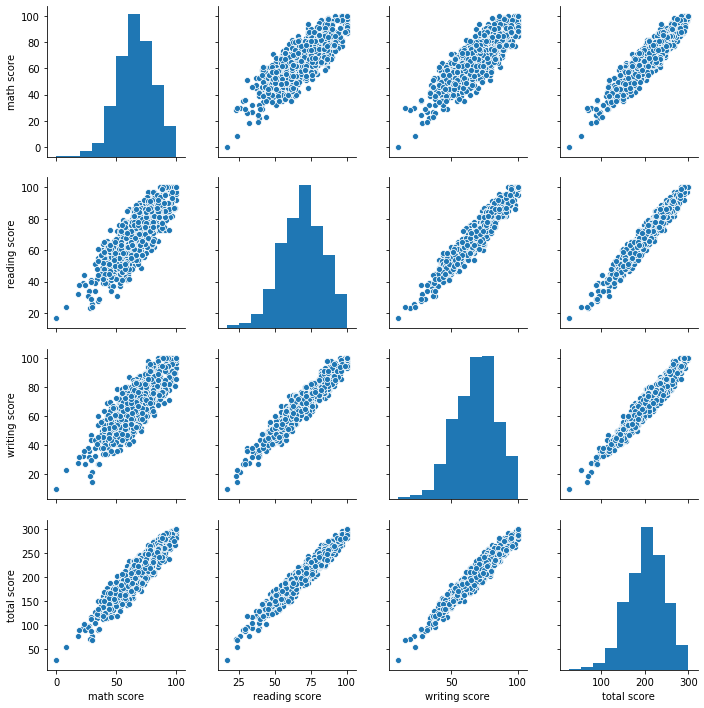

In [46]:
sns.pairplot(df)

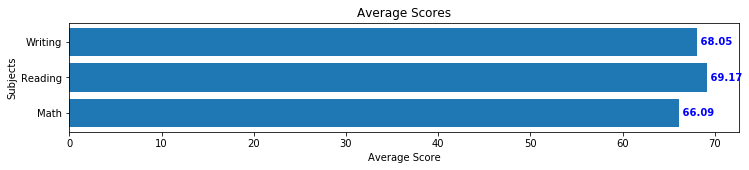

In [47]:
y = ['Math','Reading','Writing']
width = [df['math score'].mean(),df['reading score'].mean(),df['writing score'].mean()]

plt.figure(figsize = (12,2))
plt.barh(y = y,width = width)
plt.title('Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Subjects')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

Average score is highest in reading and lowest in mathematics.

### Analyzing Scores based on Gender

In [48]:
df_gender = df.groupby('gender')

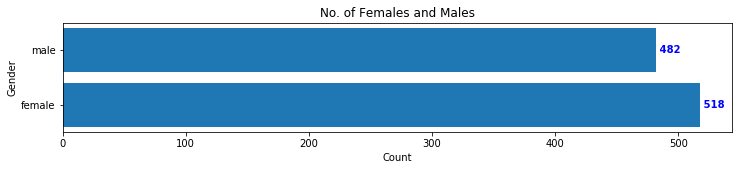

In [49]:
y = df_gender['gender'].count().keys()
width = df_gender['gender'].count()
plt.figure(figsize = (12,2))
plt.barh(y = y,width = width)
plt.title('No. of Females and Males')
plt.xlabel('Count')
plt.ylabel('Gender')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

Average scores of Females and Males

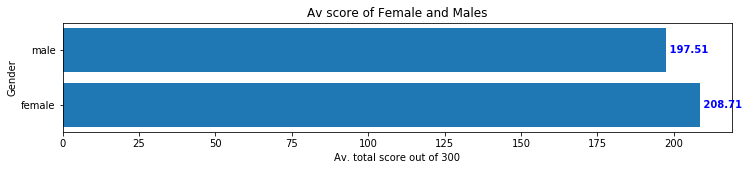

In [50]:
y = df_gender['total score'].mean().keys()
width = df_gender['total score'].mean()
plt.figure(figsize = (12,2))
plt.barh(y = y,width = width)
plt.title('Av score of Female and Males')
plt.xlabel('Av. total score out of 300')
plt.ylabel('Gender')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

Female students have performed better than Male students.

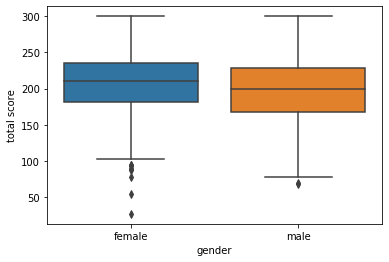

In [51]:
sns.boxplot(x="gender", y="total score", data=df)

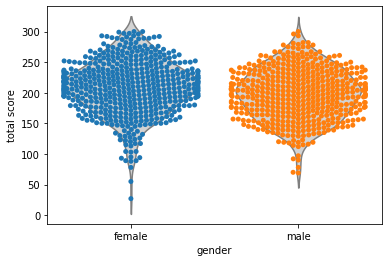

In [52]:
sns.swarmplot(x='gender',y='total score',data=df)
sns.violinplot(x='gender',y='total score',data=df, inner=None,color='lightgray')

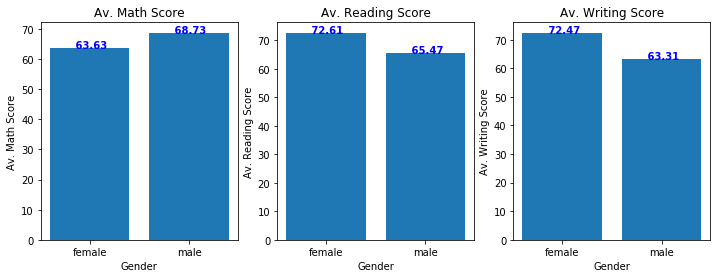

In [53]:
x = df_gender['gender'].count().keys()

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
height = df_gender['math score'].mean()
plt.bar(x = x,height = height)
plt.title('Av. Math Score')
plt.xlabel('Gender')
plt.ylabel('Av. Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = df_gender['reading score'].mean()
plt.bar(x = x,height = height)
plt.title('Av. Reading Score')
plt.xlabel('Gender')
plt.ylabel('Av. Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,3)
height = df_gender['writing score'].mean()
plt.bar(x = x,height = height)
plt.title('Av. Writing Score')
plt.xlabel('Gender')
plt.ylabel('Av. Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha = 'center', fontweight='bold')

plt.show()

Male students performed better in mathematics than female students but worse in both reading and writing.

### Analyzing scores based on Race/Ethnicity

In [54]:
df_race = df.groupby('race/ethnicity')

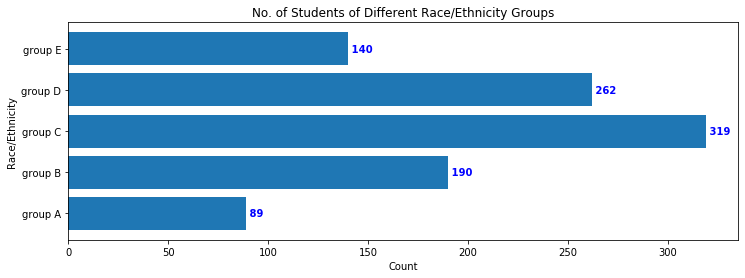

In [55]:
y = df_race['race/ethnicity'].count().keys()
width = df_race['race/ethnicity'].count()
plt.figure(figsize = (12,4))
plt.barh(y = y, width = width)
plt.title('No. of Students of Different Race/Ethnicity Groups')
plt.xlabel('Count')
plt.ylabel('Race/Ethnicity')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

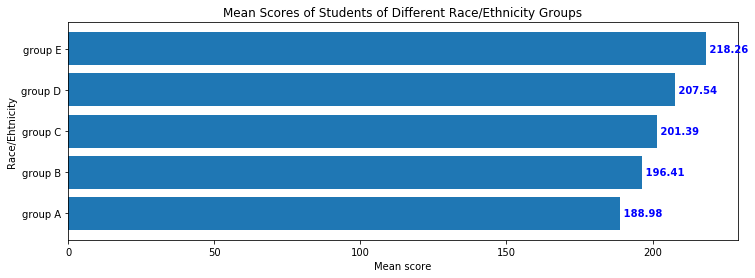

In [56]:
y = df_race['total score'].mean().keys()
width = df_race['total score'].mean()
plt.figure(figsize = (12,4))
plt.barh(y = y,width = width)
plt.title('Mean Scores of Students of Different Race/Ethnicity Groups')
plt.xlabel('Mean score')
plt.ylabel('Race/Ehtnicity')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

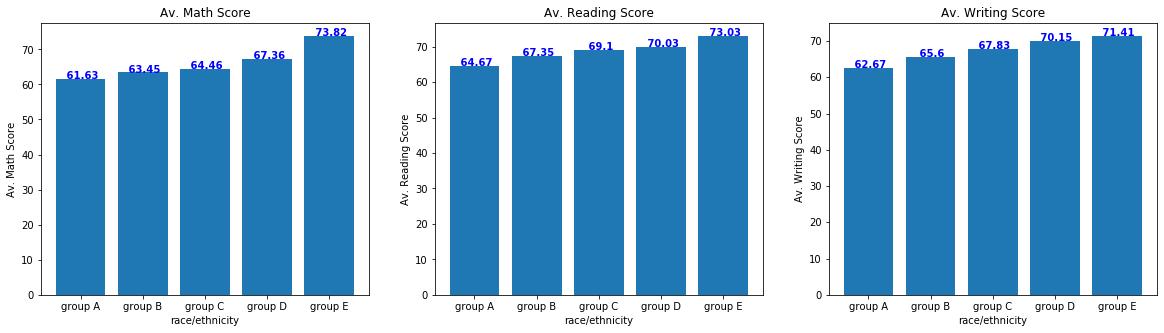

In [57]:
x = df_race['total score'].mean().keys()

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
height = df_race['math score'].mean()
plt.bar(x = x,height = height)
plt.title('Av. Math Score')
plt.xlabel('race/ethnicity')
plt.ylabel('Av. Math Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,2)
height = df_race['reading score'].mean()
plt.bar(x = x,height = height)
plt.title('Av. Reading Score')
plt.xlabel('race/ethnicity')
plt.ylabel('Av. Reading Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')

plt.subplot(1,3,3)
height = df_race['writing score'].mean()
plt.bar(x = x,height = height)
plt.title('Av. Writing Score')
plt.xlabel('race/ethnicity')
plt.ylabel('Av. Writing Score')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha = 'center', fontweight='bold')

plt.show()

Students belonging to group E have performed best in all subjects with students of group A performing the worst.

### Analyzing Scores based on Parental Level of Education

Counting students based on the parental level of education

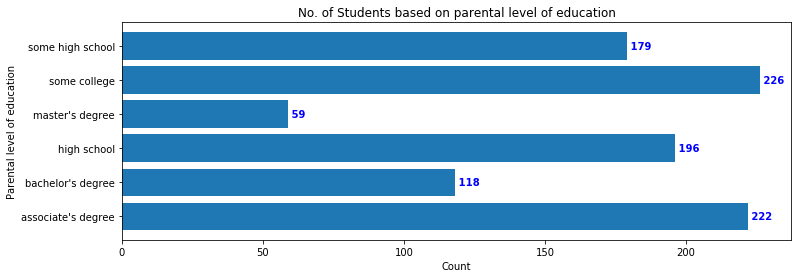

In [78]:
df_parental = df.groupby('parental level of education')
y = df_parental['parental level of education'].count().keys()
width = df_parental['parental level of education'].count()
plt.figure(figsize = (12,4))
plt.barh(y = y,width = width)
plt.title('No. of Students based on parental level of education')
plt.xlabel('Count')
plt.ylabel('Parental level of education')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

Mean score of students based on the parental level of education

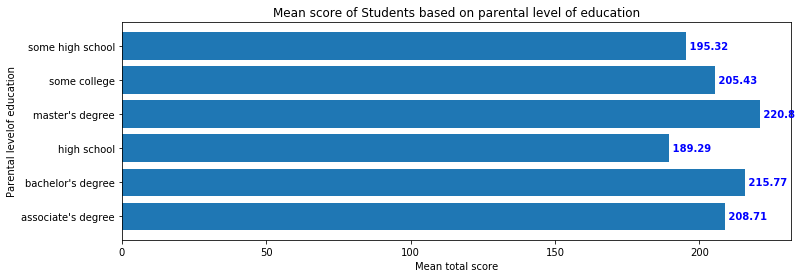

In [59]:
y = df_parental['total score'].mean().keys()
width = df_parental['total score'].mean()
plt.figure(figsize = (12,4))
plt.barh(y = y,width = width)
plt.title('Mean score of Students based on parental level of education')
plt.xlabel('Mean total score')
plt.ylabel('Parental levelof education')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

This shows that education level of parents effected the students performance.
The students with educated parents tends to get more score than others

### Analyzing scores based on Lunch

In [60]:
df_lunch = df.groupby('lunch')

Counting students according to lunch type

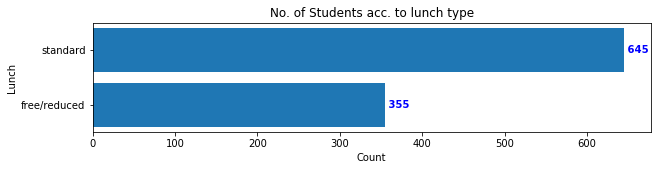

In [61]:
y = df_lunch['lunch'].count().keys()
width = df_lunch['lunch'].count()
plt.figure(figsize = (10,2))
plt.barh(y = y,width = width)
plt.title('No. of Students acc. to lunch type')
plt.xlabel('Count')
plt.ylabel('Lunch')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

Students taking standard lunch have performed significantly better than students taking free/reduced lunch.

### Analyzing students scores based on Test preparation course

In [62]:
df_test = df.groupby('test preparation course')

Count of students based on test preparation course

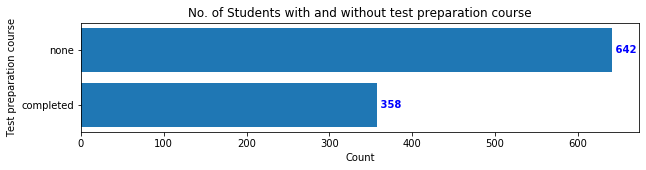

In [63]:
y = df_test['test preparation course'].count().keys()
width = df_test['test preparation course'].count()
plt.figure(figsize = (10,2))
plt.barh(y = y,width = width)
plt.title('No. of Students with and without test preparation course')
plt.xlabel('Count')
plt.ylabel('Test preparation course')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.show()

Mean scores of students based on test preparation course

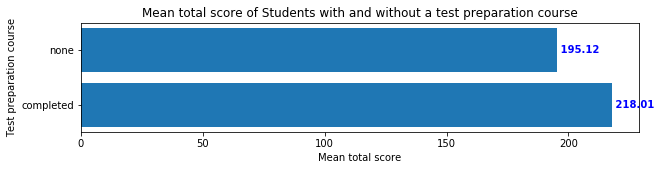

In [64]:
y = df_test['total score'].mean().keys()
width = df_test['total score'].mean()
plt.figure(figsize = (10,2))
plt.barh(y = y,width = width)
plt.title('Mean total score of Students with and without a test preparation course')
plt.xlabel('Mean total score')
plt.ylabel('Test preparation course')
for i,v in enumerate(width):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.show()

Students who took test preparation course have performed better.

### Conclusion
Female students lag behind male students in maths whereas male students in reading and writing.

Higher parental education improves score of students.

Students with free/reduced lunch have performed worse than students taking standard lunch.

Test preparation course has helped students score more.